# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api_key
print("Beginning Data Retrieval")
print(".......................")
record = 1
cityset = 1
for city in cities:
    query_url = url+"&appid="+api_key+"&q="+city+"&units="+units
    if record > 50:
        cityset = cityset + 1
        record = 1
        time.sleep(60)
    print("Processing Record " + str(record)  + " of Set " + str(cityset) + " | " + city)
    try:
        response = requests.get(query_url).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        record = record + 1

        
    except:
        print("City not found... skipping.")
    continue
    

Beginning Data Retrieval
.......................
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | chimbote
Processing Record 6 of Set 1 | jhabua
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | basmat
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | palu
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | brae
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | tarauaca
Processing Record 23 of Set 1 | atuona
Processing Record 24 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
cities_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
})

In [59]:
cities_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [60]:
cities_df.head()
cities_df.to_csv("output_data/city_weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

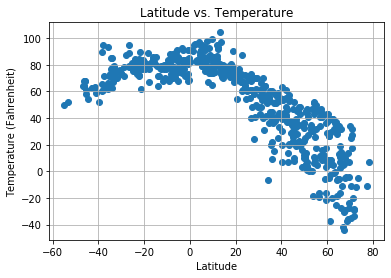

In [61]:
lat_temp = plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o")

plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_tempfig")

#### Latitude vs. Humidity Plot

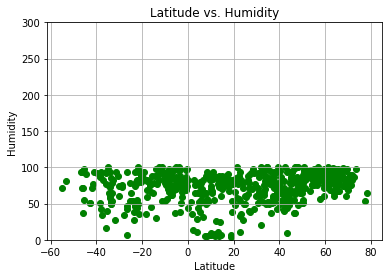

In [62]:
lat_temp = plt.scatter(cities_df["Lat"], cities_df["Humidity"],color='green', marker="o")

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,300)
plt.savefig("output_data/lat_humidity")

#### Latitude vs. Cloudiness Plot

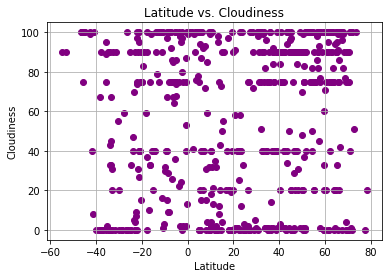

In [63]:
lat_temp = plt.scatter(cities_df["Lat"], cities_df["Cloudiness"],color='purple', marker="o")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_cloudiness")

#### Latitude vs. Wind Speed Plot

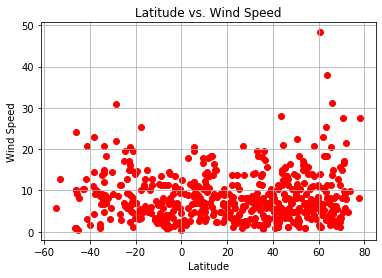

In [64]:
lat_temp = plt.scatter(cities_df["Lat"], cities_df["Wind Speed"],color='red', marker="o")

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_wind")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [71]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = cities_df[cities_df['Lat']>0]
southern_hem = cities_df[cities_df["Lat"]<0]

In [72]:
northern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Cherskiy,77,RU,1579878400,96,68.75,161.30,-36.92,3.04
5,Jhabua,0,IN,1579878365,33,22.77,74.60,67.59,6.55
6,Torbay,40,CA,1579878399,77,47.67,-52.73,35.01,16.44
7,Basmat,0,IN,1579878401,38,19.32,77.17,76.91,3.94
8,George Town,20,MY,1579878282,51,5.41,100.34,86.00,9.17
...,...,...,...,...,...,...,...,...,...
557,Yaan,93,NG,1579879131,5,7.38,8.57,98.19,11.01
558,Taihe,98,CN,1579879131,72,30.87,105.38,42.80,7.09
559,High Rock,75,BS,1579879131,78,26.62,-78.28,73.40,8.05
560,Mabaruma,31,GY,1579879131,56,8.20,-59.78,85.24,4.34


In [73]:
southern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100,NZ,1579878400,94,-46.19,168.86,64.00,1.01
1,Rikitea,0,PF,1579878400,74,-23.12,-134.97,77.22,17.16
2,Ushuaia,90,AR,1579878400,71,-54.80,-68.30,50.00,5.82
4,Chimbote,15,PE,1579878401,56,-9.09,-78.58,81.21,7.00
9,Palu,87,ID,1579878401,96,-0.89,119.87,68.09,2.08
...,...,...,...,...,...,...,...,...,...
519,Tolaga Bay,0,NZ,1579879067,87,-38.37,178.30,65.55,4.23
536,Nambucca Heads,55,AU,1579879069,88,-30.65,153.00,75.99,5.82
538,Richards Bay,0,ZA,1579879069,75,-28.78,32.04,78.46,30.89
542,Presidencia Roque Saenz Pena,0,AR,1579879069,42,-26.79,-60.44,89.20,4.23


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.761984358731967


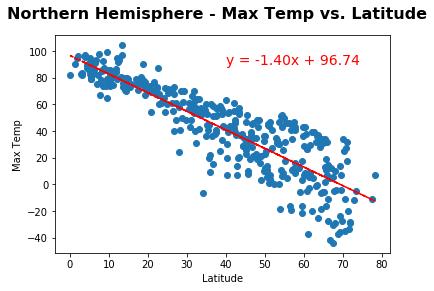

In [131]:
x = northern_hem["Lat"]
y = northern_hem["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Northern Hemisphere - Max Temp vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(40, 90, 'y = -1.40x + 96.74', fontsize=14, color='red')
plt.savefig("output_data/north_temp_lat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.28407751604199266


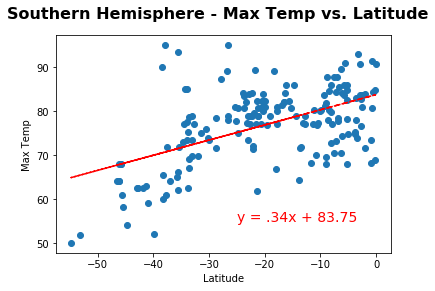

In [132]:
x = southern_hem["Lat"]
y = southern_hem["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Southern Hemisphere - Max Temp vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(-25, 55, 'y = .34x + 83.75', fontsize=14, color='red')
plt.savefig("output_data/south_temp_lat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.187180455116335


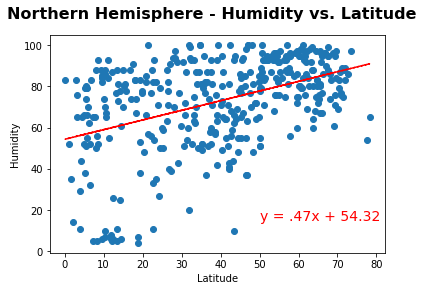

In [133]:
x = northern_hem["Lat"]
y = northern_hem["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Northern Hemisphere - Humidity vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(50, 15, 'y = .47x + 54.32', fontsize=14, color='red')
plt.savefig("output_data/north_hum_lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.021432519399567553


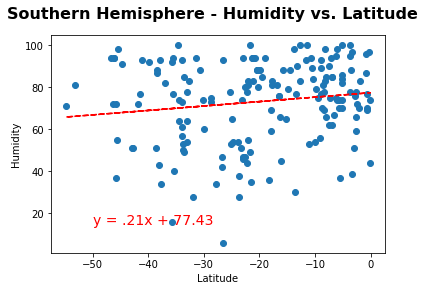

In [134]:
x = southern_hem["Lat"]
y = southern_hem["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Southern Hemisphere - Humidity vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(-50, 15, 'y = .21x + 77.43', fontsize=14, color='red')
plt.savefig("output_data/south_hum_lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.03975459374128971


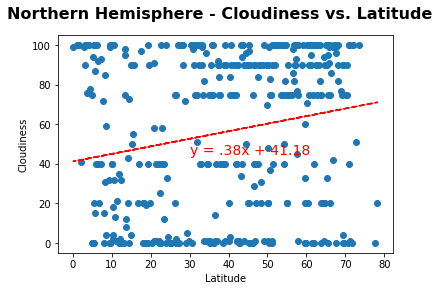

In [135]:
x = northern_hem["Lat"]
y = northern_hem["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Northern Hemisphere - Cloudiness vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(30, 45, 'y = .38x + 41.18', fontsize=14, color='red')
plt.savefig("output_data/north_cloud_lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.009826103241623543


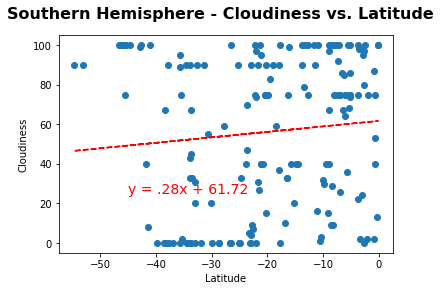

In [136]:
x = southern_hem["Lat"]
y = southern_hem["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Southern Hemisphere - Cloudiness vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(-45, 25, 'y = .28x + 61.72', fontsize=14, color='red')
plt.savefig("output_data/south_cloud_lat")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.0025642392133948476


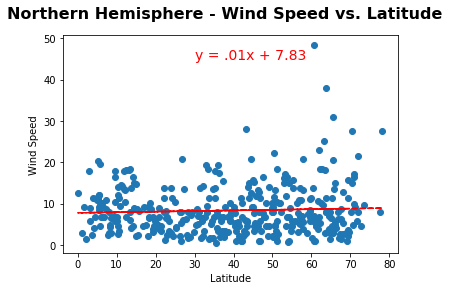

In [137]:
x = northern_hem["Lat"]
y = northern_hem["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Northern Hemisphere - Wind Speed vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(30, 45, 'y = .01x + 7.83', fontsize=14, color='red')
plt.savefig("output_data/north_wind_lat")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.0674848381559852


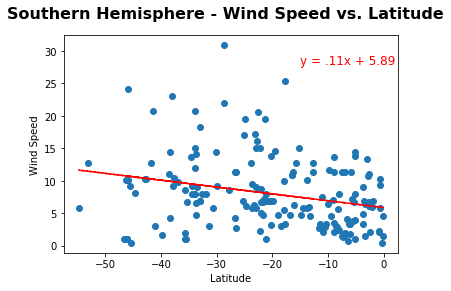

In [138]:
x = southern_hem["Lat"]
y = southern_hem["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print ("r-squared:", r_value**2)
fit = slope * x + intercept
fig, ax = plt.subplots()

fig.suptitle("Southern Hemisphere - Wind Speed vs. Latitude", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
ax.text(-15, 28, 'y = .11x + 5.89', fontsize=12, color='red')
plt.savefig("output_data/south_wind_lat")